## Data Cleaning, Describing, and Visualization

### Step 1 - Get your environment setup

1. Install Git on your computer and fork the class repository on [Github](https://github.com/tfolkman/byu_econ_applied_machine_learning).
2. Install [Anaconda](https://conda.io/docs/install/quick.html) and get it working.

### Step 2 - Explore Datasets

The goals of this project are:

1. Read in data from multiple sources
2. Gain practice cleaning, describing, and visualizing data

To this end, you need to find from three different sources. For example: CSV, JSON, and API, SQL, or web scraping. For each of these data sets, you must perform the following:

1. Data cleaning. Some options your might consider: handle missing data, handle outliers, scale the data, convert some data to categorical.
2. Describe data. Provide tables, statistics, and summaries of your data.
3. Visualize data. Provide visualizations of your data.

These are the typical first steps of any data science project and are often the most time consuming. My hope is that in going through this process 3 different times, that you will gain a sense for it.

Also, as you are doing this, please tell us a story. Explain in your notebook why are doing what you are doing and to what end. Telling a story in your analysis is a crucial skill for data scientists. There are almost an infinite amount of ways to analyze a data set; help us understand why you choose your particular path and why we should care.

Also - this homework is very open-ended and we provided you with basically no starting point. I realize this increases the difficulty and complexity, but I think it is worth it. It is much closer to what you might experience in industry and allows you to find data that might excite you!

In [80]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Data Set #1: Demographic Data

For my first data set I will import US demographic data via a CSV file.  This will allow me to analyze how US State Demographics have changed over time.

In [81]:
df = pd.read_csv('state_demographics.csv')
df.head()

,statefips,year,statepop,pctwhite,pctnatvieamerican,pctasian,pcthisp,pctblack
0,01. Alabama *,1993,4193114,0.734552,0.003784,0.006001,0.006747,0.255664
1,01. Alabama *,1995,4262731,0.732204,0.003632,0.006324,0.007751,0.257840
2,01. Alabama *,1996,4290403,0.731832,0.003608,0.006390,0.008365,0.258170
3,01. Alabama *,1997,4320281,0.730659,0.003527,0.006449,0.009106,0.259365
4,01. Alabama *,2000,4369862,0.729566,0.003341,0.003341,0.010378,0.260586


Right off the bat I don't like how my States are displayed.  Each State string leads with a number in addition to my index and many of the States have asterisks on the end.  I will split these components to leave only the state name.

In [82]:
df.statefips=df.statefips.map(lambda x: x.split()[1])  #This splits off from the white space on either side of state
df.head()

,statefips,year,statepop,pctwhite,pctnatvieamerican,pctasian,pcthisp,pctblack
0,Alabama,1993,4193114,0.734552,0.003784,0.006001,0.006747,0.255664
1,Alabama,1995,4262731,0.732204,0.003632,0.006324,0.007751,0.257840
2,Alabama,1996,4290403,0.731832,0.003608,0.006390,0.008365,0.258170
3,Alabama,1997,4320281,0.730659,0.003527,0.006449,0.009106,0.259365
4,Alabama,2000,4369862,0.729566,0.003341,0.003341,0.010378,0.260586


I would also prefer to see percentages for each group rather than decimals.  This can be easily fixed.

In [83]:
df['pctwhite']=df['pctwhite']*100
df['pctnatvieamerican']=df['pctnatvieamerican']*100
df['pctasian']=df['pctasian']*100
df['pcthisp']=df['pcthisp']*100
df['pctblack']=df['pctblack']*100
df.head()

,statefips,year,statepop,pctwhite,pctnatvieamerican,pctasian,pcthisp,pctblack
0,Alabama,1993,4193114,73.455167,0.378382,0.600079,0.674654,25.566369
1,Alabama,1995,4262731,73.220378,0.363194,0.632411,0.775137,25.784010
2,Alabama,1996,4290403,73.183197,0.360805,0.638984,0.836495,25.817016
3,Alabama,1997,4320281,73.065925,0.352709,0.644912,0.910589,25.936463
4,Alabama,2000,4369862,72.956586,0.334084,0.334084,1.037767,26.058626


It may be of particular interest to examine how the minority population has fluctuated over time.  I generate a new column by subtracting the percentage of the state that identifies as white from the whole.

In [84]:
df['pctnonwhite']=100-df['pctwhite']
df.head()

,statefips,year,statepop,pctwhite,pctnatvieamerican,pctasian,pcthisp,pctblack,pctnonwhite
0,Alabama,1993,4193114,73.455167,0.378382,0.600079,0.674654,25.566369,26.544833
1,Alabama,1995,4262731,73.220378,0.363194,0.632411,0.775137,25.784010,26.779622
2,Alabama,1996,4290403,73.183197,0.360805,0.638984,0.836495,25.817016,26.816803
3,Alabama,1997,4320281,73.065925,0.352709,0.644912,0.910589,25.936463,26.934075
4,Alabama,2000,4369862,72.956586,0.334084,0.334084,1.037767,26.058626,27.043414


Let's see what years we have to work with in our data.

In [85]:
df['year'].value_counts()

2012    51
2000    49
2002    48
1996    42
1997    37
2008    34
1995    33
1993    33
2006    30
2004    29
Name: year, dtype: int64

It seems that 2012 is the most recent (and most complete) set of demographic data.  We may take another look at specific years later on.  For now, let's plot how the minority population changes with state population.

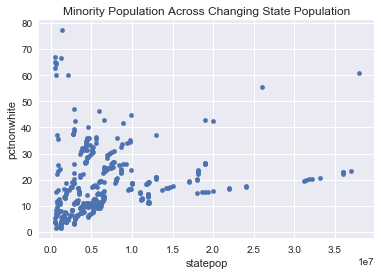

In [86]:
%matplotlib inline
df.plot.scatter(y='pctnonwhite',x='statepop', title= 'Minority Population Across Changing State Population')

It appears that the minority population (as a proportion of the whole) increases with state population.  This may be due to immigration contributing more to state population than natural increase or domestic migration over time or to minority populations choosing to live in more urban areas on average. Likely it is a combination of several factors. To track how the minority population has changed over time I can plot the proportion of the population that is minority from year to year.

([<matplotlib.axis.XTick at 0x142f94a90>,
 <a list of 11 Text xticklabel objects>)

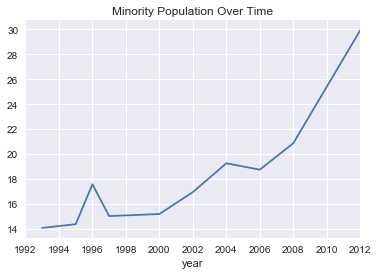

In [129]:
df['pctnonwhite'].groupby(df['year']).mean().plot()
plt.title('Minority Population Over Time')
plt.xticks([1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012])

This graph shows that the minority population has followed a clear upward trend in recent years.  Before we do any further analysis, let's describe our data.  I will round to two decimal points.

In [88]:
df.describe().round(decimals=2)

,year,statepop,pctwhite,pctnatvieamerican,pctasian,pcthisp,pctblack,pctnonwhite
count,386.00,386.00,386.00,386.00,386.00,386.00,386.00,386.00
mean,2001.56,6765492.92,81.48,1.22,2.80,8.35,12.20,18.52
std,5.98,6618647.48,12.58,2.02,4.22,9.07,10.85,12.58
min,1993.00,469033.00,22.85,0.13,0.14,0.50,0.36,1.61
25%,1996.00,2800000.00,75.83,0.29,1.09,2.34,3.74,9.72
50%,2000.00,5056230.00,83.88,0.53,1.82,4.97,9.46,16.12
75%,2006.00,8043039.50,90.28,1.15,3.31,10.61,16.41,24.17
max,2012.00,38000000.00,98.39,14.28,63.13,46.98,63.72,77.15


From this simple summary, we can see that the mean minortity population is only slightly higher than the median suggesting more homogeneity across states than I expected to find.  It may be that individual cities are much more or much less diverse than the average city, but states as a whole are relatively comparable in their demographics.  Let's make sure there isn't anything flukey going on with null values.

In [89]:
df.isnull().describe()

,statefips,year,statepop,pctwhite,pctnatvieamerican,pctasian,pcthisp,pctblack,pctnonwhite
count,386,386,386,386,386,386,386,386,386
unique,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False
freq,386,386,386,386,386,386,386,386,386


From this output we can see that none of the values remaining in our data are null.  Given the data we had to work with we can feel reasonably good about drawing general conclusions about the demographic trends we have represented here with the caveat that our data only extends to 2012 and we have several missing years of census observations within our analyzed timeframe.

Data Set #2: Airlines

For this data set I pulled airline arrival data from the R Studio library and saved it to a STATA file for easy upload.  Let's see what we can find.

In [90]:
air= pd.read_stata("airline_stat.dta")
air.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400.0,5.0,15.0,19359.0
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416.0,5.0,29.0,19359.0
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089.0,5.0,40.0,19359.0
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576.0,5.0,45.0,19359.0
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762.0,6.0,0.0,19359.0


In [91]:
air.describe().round(decimals=2)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute,time_hour
count,336776.0,336776.00,336776.00,328521.00,336776.00,328521.00,328063.00,336776.00,327346.00,336776.00,327346.00,336776.00,336776.00,336776.00,336776.00
mean,2013.0,6.55,15.71,1349.11,1344.25,12.64,1502.05,1536.38,6.90,1971.92,150.69,1039.91,13.18,26.23,19541.66
std,0.0,3.41,8.77,488.28,467.34,40.21,533.26,497.46,44.63,1632.47,93.69,733.23,4.66,19.30,104.28
min,2013.0,1.00,1.00,1.00,106.00,-43.00,1.00,1.00,-86.00,1.00,20.00,17.00,1.00,0.00,19359.00
25%,2013.0,4.00,8.00,907.00,906.00,-5.00,1104.00,1124.00,-17.00,553.00,82.00,502.00,9.00,8.00,19452.00
50%,2013.0,7.00,16.00,1401.00,1359.00,-2.00,1535.00,1556.00,-5.00,1496.00,129.00,872.00,13.00,29.00,19542.00
75%,2013.0,10.00,23.00,1744.00,1729.00,11.00,1940.00,1945.00,14.00,3465.00,192.00,1389.00,17.00,44.00,19632.00
max,2013.0,12.00,31.00,2400.00,2359.00,1301.00,2400.00,2359.00,1272.00,8500.00,695.00,4983.00,23.00,59.00,19723.00


Let's sort these values from least arrival delay to greatest.  Here negative values represent early flights.

In [92]:
air=air.sort_values('arr_delay').reset_index(drop=True)
air.head(10)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,5,7,1715.0,1729,-14.0,1944.0,2110,-86.0,VX,193,N843VA,EWR,SFO,315.0,2565.0,17.0,29.0,19485.0
1,2013,5,20,719.0,735,-16.0,951.0,1110,-79.0,VX,11,N840VA,JFK,SFO,316.0,2586.0,7.0,35.0,19498.0
2,2013,5,6,1826.0,1830,-4.0,2045.0,2200,-75.0,AA,269,N3KCAA,JFK,SEA,289.0,2422.0,18.0,30.0,19484.0
3,2013,5,2,1947.0,1949,-2.0,2209.0,2324,-75.0,UA,612,N851UA,EWR,LAX,300.0,2454.0,19.0,49.0,19480.0
4,2013,5,4,1816.0,1820,-4.0,2017.0,2131,-74.0,AS,7,N551AS,EWR,SEA,281.0,2402.0,18.0,20.0,19482.0
5,2013,5,2,1926.0,1929,-3.0,2157.0,2310,-73.0,UA,1628,N24212,EWR,SFO,314.0,2565.0,19.0,29.0,19480.0
6,2013,5,13,657.0,700,-3.0,908.0,1019,-71.0,B6,671,N805JB,JFK,LAX,290.0,2475.0,7.0,0.0,19491.0
7,2013,5,7,2054.0,2055,-1.0,2317.0,28,-71.0,UA,622,N806UA,EWR,SFO,309.0,2565.0,20.0,55.0,19485.0
8,2013,5,6,1753.0,1755,-2.0,2004.0,2115,-71.0,DL,1394,N3760C,JFK,PDX,283.0,2454.0,17.0,55.0,19484.0
9,2013,5,3,616.0,630,-14.0,803.0,913,-70.0,US,195,N507AY,JFK,PHX,266.0,2153.0,6.0,30.0,19481.0


In [93]:
air.tail()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NA,JFK,DCA,NaN,213.0,14.0,55.0,19631.0
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NA,LGA,SYR,NaN,198.0,22.0,0.0,19631.0
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764.0,12.0,10.0,19631.0
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419.0,11.0,59.0,19631.0
336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,MQ,3531,N839MQ,LGA,RDU,NaN,431.0,8.0,40.0,19631.0


Some of the entries don't have an entry for arrival delay.  Let's drop these values.

In [94]:
air.query('arr_delay==arr_delay').tail()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
327341,2013,7,22,845.0,1600,1005.0,1044.0,1815,989.0,MQ,3075,N665MQ,JFK,CVG,96.0,589.0,16.0,0.0,19561.0
327342,2013,9,20,1139.0,1845,1014.0,1457.0,2210,1007.0,AA,177,N338AA,JFK,SFO,354.0,2586.0,18.0,45.0,19621.0
327343,2013,1,10,1121.0,1635,1126.0,1239.0,1810,1109.0,MQ,3695,N517MQ,EWR,ORD,111.0,719.0,16.0,35.0,19368.0
327344,2013,6,15,1432.0,1935,1137.0,1607.0,2120,1127.0,MQ,3535,N504MQ,JFK,CMH,74.0,483.0,19.0,35.0,19524.0
327345,2013,1,9,641.0,900,1301.0,1242.0,1530,1272.0,HA,51,N384HA,JFK,HNL,640.0,4983.0,9.0,0.0,19367.0


That's more like it!  Now we can make this change permanent.  (We won't have to reset the index because all missing values were sorted to the bottom)

In [95]:
air=air.query('arr_delay==arr_delay')
air.tail(10)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
327336,2013,5,3,1133.0,2055,878.0,1250.0,2215,875.0,MQ,3744,N523MQ,EWR,ORD,112.0,719.0,20.0,55.0,19481.0
327337,2013,12,5,756.0,1700,896.0,1058.0,2020,878.0,AA,172,N5DMAA,EWR,MIA,149.0,1085.0,17.0,0.0,19697.0
327338,2013,7,22,2257.0,759,898.0,121.0,1026,895.0,DL,2047,N6716C,LGA,ATL,109.0,762.0,7.0,59.0,19561.0
327339,2013,3,17,2321.0,810,911.0,135.0,1020,915.0,DL,2119,N927DA,LGA,MSP,167.0,1020.0,8.0,10.0,19434.0
327340,2013,4,10,1100.0,1900,960.0,1342.0,2211,931.0,DL,2391,N959DL,JFK,TPA,139.0,1005.0,19.0,0.0,19458.0
327341,2013,7,22,845.0,1600,1005.0,1044.0,1815,989.0,MQ,3075,N665MQ,JFK,CVG,96.0,589.0,16.0,0.0,19561.0
327342,2013,9,20,1139.0,1845,1014.0,1457.0,2210,1007.0,AA,177,N338AA,JFK,SFO,354.0,2586.0,18.0,45.0,19621.0
327343,2013,1,10,1121.0,1635,1126.0,1239.0,1810,1109.0,MQ,3695,N517MQ,EWR,ORD,111.0,719.0,16.0,35.0,19368.0
327344,2013,6,15,1432.0,1935,1137.0,1607.0,2120,1127.0,MQ,3535,N504MQ,JFK,CMH,74.0,483.0,19.0,35.0,19524.0
327345,2013,1,9,641.0,900,1301.0,1242.0,1530,1272.0,HA,51,N384HA,JFK,HNL,640.0,4983.0,9.0,0.0,19367.0


Now that we've got that sorted how we want, we can visualize our data.  Let's see how departure delays for flights are related to their arrival delays.

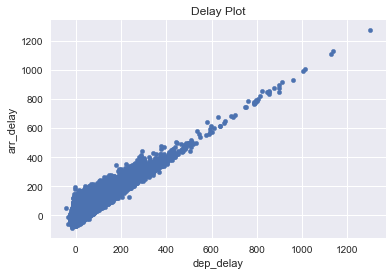

In [96]:
%matplotlib inline
air.plot.scatter(y='arr_delay',x='dep_delay', title='Delay Plot')

As we would expect, flights with higher departure delays tend to arrive later to their destinations.  Let's try something else.

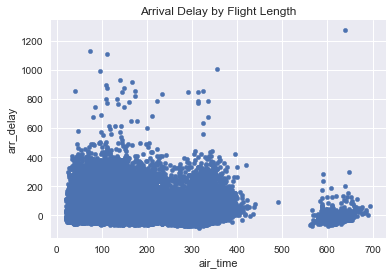

In [97]:
%matplotlib inline
air.plot.scatter(y='arr_delay',x='air_time', title='Arrival Delay by Flight Length')

Here we can observe that flights that spend a longer time in the air have lower variance in their arrival delay.  This suggests that as flight time increases, initial delays in departure become less significant.  In other words, pilots can make up time in the air.

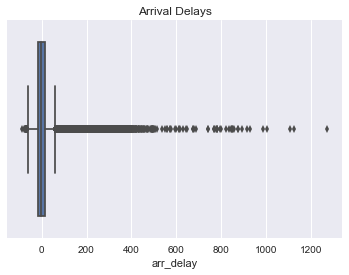

In [98]:
sns.boxplot(air.arr_delay)
plt.title('Arrival Delays')

To summarize, this boxplot shows that most flights arrive close to on time with a stricter lower bound on how early they can be.

Data Set #3: Military Bases

For a reserch position I just started in the Finance Department, Dr. Iverson asked me to find data on domestic military bases that can be converted into a workable dataset.  To my horror, none of the formats sent to me by the pentagon help desk were remotely familiar.  I will use python to convert the largest of these files from dbf format into a joined pandas data frame.

In [99]:
from simpledbf import Dbf5

In [100]:
base=Dbf5('MIRTA_Boundaries.dbf')
base=base.to_dataframe()
base.head()

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
0,Army Guard,Orchard Range TS Boise,N/A,Idaho,United States,Active
1,Army Guard,"Fort Pickett, ARNG MTC",N/A,Virginia,United States,Active
2,Army Guard,Camp Dodge Johnston TS,N/A,Iowa,United States,Active
3,Army Guard,NG TS Clark Natl Forest Wappapello,N/A,Missouri,United States,Active
4,Army Guard,CTC Fort Custer Trng Center,N/A,Michigan,United States,Active


This first data frame contains 846 observations and documents the name of the base, operation status, location, and corresponding branch of the military.  I will now load in the second set of military base data I have from the pentagon zip file.

In [101]:
base2=Dbf5('MIRTA_Points.dbf')
base2=base2.to_dataframe()
base2.head()

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
0,AF Guard,Luis Munoz Marin IAP,N/A,Puerto Rico,Puerto Rico,Active
1,AF Guard,NAS JRB New Orleans,N/A,Louisiana,United States,Active
2,AF Guard,Gulfport-Biloxi Regional Airport (ANG),N/A,Mississippi,United States,Active
3,AF Guard,Jacksonville IAP,N/A,Florida,United States,Active
4,AF Guard,Tucson IAP,N/A,Arizona,United States,Active


This frame follows the same format as the first and adds another 846 observations.  From inspection of the data I believe at least some of these observations to be distinct from the boundaries file.  I will append this second frame onto the first to form one consolidated data set.

In [102]:
base = base.append(base2)
base.head()

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
0,Army Guard,Orchard Range TS Boise,N/A,Idaho,United States,Active
1,Army Guard,"Fort Pickett, ARNG MTC",N/A,Virginia,United States,Active
2,Army Guard,Camp Dodge Johnston TS,N/A,Iowa,United States,Active
3,Army Guard,NG TS Clark Natl Forest Wappapello,N/A,Missouri,United States,Active
4,Army Guard,CTC Fort Custer Trng Center,N/A,Michigan,United States,Active


I reset the index in the following cell to stop the count from restarting at 0 along the seam of the first and second base files.  I can check that this reindex worked properly using the tail command.

In [103]:
base=base.reset_index(drop=True)
base.tail()

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
1591,AF Active,Los Angeles Air Force Annex No.4,N/A,California,United States,Active
1592,Army Active,Fort Wainwright,N/A,Alaska,United States,Active
1593,Army Active,Fort Stewart,N/A,Georgia,United States,Active
1594,Army Reserve,Fort Hunter Liggett,N/A,California,United States,Active
1595,Army Active,Fort Drum,N/A,New York,United States,Active


In [104]:
base.describe()

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
count,1596,1596,1596,1596,1596,1596
unique,10,845,15,53,3,2
top,Navy Active,NAS JRB New Orleans,N/A,California,United States,Active
freq,474,3,1459,174,1524,1510


I want to verify that my data set contains strictly domestic files.  Using the value_counts operation I can see that my set contains only U.S. territories.

In [105]:
base['COUNTRY'].value_counts()

United States    1524
Guam               54
Puerto Rico        18
Name: COUNTRY, dtype: int64

I want to see proportion of each military component represented in my data set.  I can plot this visually using a bar chart.

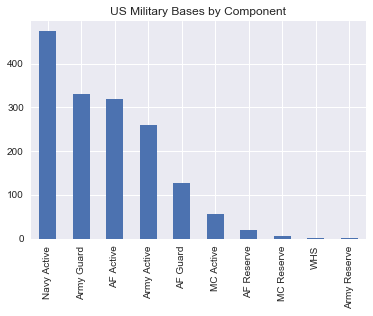

In [106]:
base['COMPONENT'].value_counts().plot(kind='bar')
plt.title('US Military Bases by Component')

After looking over the data tables again I decide that it may be convenient to have my data sorted alphabetically by state and territory I can arrange this easily using the sort_values command.

In [107]:
base=base.sort_values('STATE_TERR').reset_index(drop=True)
base.tail()

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
1591,AF Active,F E Warren AFB,N/A,Wyoming,United States,Active
1592,Army Guard,MTCH Camp Guernsey,N/A,Wyoming,United States,Active
1593,Army Guard,MTCH Camp Guernsey,N/A,Wyoming,United States,Active
1594,AF Guard,Cheyenne Regional Apt,N/A,Wyoming,United States,Active
1595,AF Guard,Cheyenne Regional Apt,N/A,Wyoming,United States,Active


Looking at this data frame in alphabetical order gives the added benefit of confirming my suspicion of duplicates in the data.  I confirm this by looking at more of the frame.

In [108]:
base

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
0,Navy Active,NOLF Wolf,N/A,Alabama,United States,Active
1,AF Guard,Birmingham Airport,N/A,Alabama,United States,Active
2,Army Active,10C Stagefield,N/A,Alabama,United States,Active
3,AF Guard,Montgomery Regional Airport ANGB,N/A,Alabama,United States,Active
4,Navy Active,NOLF Summerdale,N/A,Alabama,United States,Active
5,Navy Active,NOLF Silverhill,N/A,Alabama,United States,Active
6,Navy Active,NOLF Evergreen,N/A,Alabama,United States,Active
7,Army Guard,Fort McClellan ARNG Training Center,N/A,Alabama,United States,Active
8,Navy Active,NOLF Brewton,N/A,Alabama,United States,Active
9,Navy Active,Barin Field,N/A,Alabama,United States,Active


Line 0 and line 13 are exactly the same and a cursory glance yields several more examples.  I decide to drop duplicates.  Before I save this change to the original data frame I can take a view of the frame to make sure it does what I want.  Sure enough, the duplicate NOLF Wolf base has been dropped.  I will resave the data frame and reset the index.

In [109]:
base.drop_duplicates().head(15)

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
0,Navy Active,NOLF Wolf,N/A,Alabama,United States,Active
1,AF Guard,Birmingham Airport,N/A,Alabama,United States,Active
2,Army Active,10C Stagefield,N/A,Alabama,United States,Active
3,AF Guard,Montgomery Regional Airport ANGB,N/A,Alabama,United States,Active
4,Navy Active,NOLF Summerdale,N/A,Alabama,United States,Active
5,Navy Active,NOLF Silverhill,N/A,Alabama,United States,Active
6,Navy Active,NOLF Evergreen,N/A,Alabama,United States,Active
7,Army Guard,Fort McClellan ARNG Training Center,N/A,Alabama,United States,Active
8,Navy Active,NOLF Brewton,N/A,Alabama,United States,Active
9,Navy Active,Barin Field,N/A,Alabama,United States,Active


In [110]:
base=base.drop_duplicates().reset_index(drop=True)
base.head(15)

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
0,Navy Active,NOLF Wolf,N/A,Alabama,United States,Active
1,AF Guard,Birmingham Airport,N/A,Alabama,United States,Active
2,Army Active,10C Stagefield,N/A,Alabama,United States,Active
3,AF Guard,Montgomery Regional Airport ANGB,N/A,Alabama,United States,Active
4,Navy Active,NOLF Summerdale,N/A,Alabama,United States,Active
5,Navy Active,NOLF Silverhill,N/A,Alabama,United States,Active
6,Navy Active,NOLF Evergreen,N/A,Alabama,United States,Active
7,Army Guard,Fort McClellan ARNG Training Center,N/A,Alabama,United States,Active
8,Navy Active,NOLF Brewton,N/A,Alabama,United States,Active
9,Navy Active,Barin Field,N/A,Alabama,United States,Active


When I take a tail  of the data frame I can see that the vast majority of the rows added from my second dbf file were duplicates (First data frame had 846 rows each with a unique Site Name).  

In [111]:
base.tail(10)

,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT
840,Navy Active,Allegany Ballistics Lab,N/A,West Virginia,United States,Active
841,Navy Active,NIOC Sugar Grove,N/A,West Virginia,United States,Active
842,AF Guard,Truax ANGB,N/A,Wisconsin,United States,Active
843,Army Guard,Camp Williams Tomah MTA,N/A,Wisconsin,United States,Active
844,Army Active,Badger AAP,N/A,Wisconsin,United States,Inactive
845,AF Guard,Gen Mitchell IAP,N/A,Wisconsin,United States,Active
846,AF Guard,Volk ANGB,N/A,Wisconsin,United States,Active
847,AF Active,F E Warren AFB,N/A,Wyoming,United States,Active
848,Army Guard,MTCH Camp Guernsey,N/A,Wyoming,United States,Active
849,AF Guard,Cheyenne Regional Apt,N/A,Wyoming,United States,Active


Now that I have the data cleaned, sorted, and joined the way I want it I can save it to a csv file and send it to my boss for his convenience.

In [ ]:
base.to_csv("base.csv") #saves cleaned data to same folder as notebook